d:\ALBERTSCHOOL\SupervisedML\supervised_ml_project_waerniers_lamy
Accuracy : 0.6577669902912622
Precision: 0.6174863387978142
Recall   : 0.6141304347826086
F1 score : 0.6158038147138964


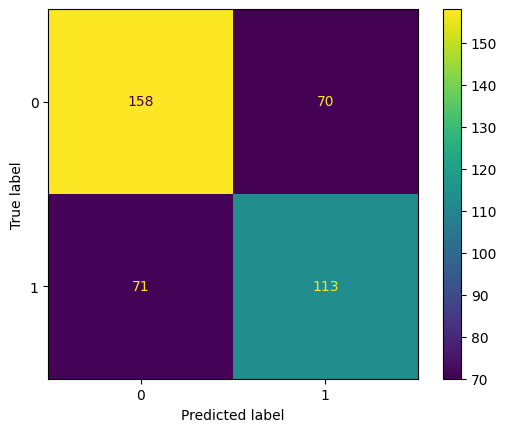

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Get project path
cwd = os.getcwd()
print(cwd)

# Download test dataset
bank_full = pd.read_csv(os.path.join(cwd, "data", "bank-additional-full.csv"), sep=";")

bank_full.y = bank_full.y.map({"yes": 1, "no":0})
bank_stable = bank_full.iloc[39130:].reset_index(drop=True)

# chronological train/test split
train_size = 0.8
split = int(len(bank_stable)*train_size)
train_set = bank_stable.iloc[:split].copy()
test_set = bank_stable.iloc[split:].copy()

# Split X and y from train dataset
X_test = test_set.drop(columns=['y'])

# Map target
y_test = test_set.y

# Best trained model
model_id = "saved_pipelines\Random_Forest_pipeline_1763047689.pkl" 

# Load corresponding pipeline
pipeline = joblib.load(os.path.join(cwd, model_id))

# Predict
y_pred = pipeline.predict(X_test)

# Display metrics, objective is to maximize recall since y distribution is very imbalanced
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 score :", f1_score(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
